元の文字列: huffman coding example

ハフマン符号:
' ': 1011
'a': 1100
'c': 0001
'd': 11100
'e': 001
'f': 1010
'g': 0110
'h': 0000
'i': 0111
'l': 11111
'm': 100
'n': 010
'o': 11110
'p': 11010
'u': 11101
'x': 11011

エンコード結果:
0000111011010101010011000101011000111110111000111010011010110011101111001001101011111001

デコード結果:
huffman coding example

ハフマン木（テキスト可視化）:
└─* (22)
    └─* (8)
        └─* (4)
            └─* (2)
                └─'h' (1)
                └─'c' (1)
            └─'e' (2)
        └─* (4)
            └─'n' (2)
            └─* (2)
                └─'g' (1)
                └─'i' (1)
    └─* (14)
        └─* (6)
            └─'m' (2)
            └─* (4)
                └─'f' (2)
                └─' ' (2)
        └─* (8)
            └─* (4)
                └─'a' (2)
                └─* (2)
                    └─'p' (1)
                    └─'x' (1)
            └─* (4)
                └─* (2)
                    └─'d' (1)
                    └─'u' (1)
                └─* (2)
            

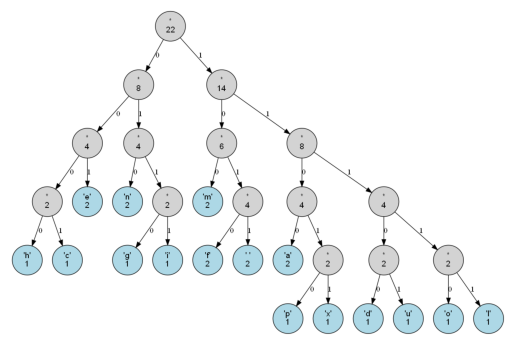

In [4]:
import heapq
from collections import Counter
from graphviz import Digraph

# ノードクラス
class Node:
    def __init__(self, char=None, freq=0):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# ハフマン木構築
def build_huffman_tree(text):
    freq = Counter(text)
    heap = [Node(char, f) for char, f in freq.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(freq=left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# ハフマン符号生成
def build_codes(node, prefix='', code_map=None):
    if code_map is None:
        code_map = {}
    if node.char is not None:
        code_map[node.char] = prefix
    else:
        build_codes(node.left, prefix + '0', code_map)
        build_codes(node.right, prefix + '1', code_map)
    return code_map

# ハフマン木の描画（カラーつき）
def draw_huffman_tree_colored(node):
    dot = Digraph(format='png')
    dot.attr('node', style='filled', fontname='Helvetica')

    def add_nodes_edges(node, parent_id=None, edge_label=''):
        node_id = str(id(node))
        if node.char is not None:
            label = f"'{node.char}'\\n{node.freq}"
            dot.node(node_id, label, fillcolor='lightblue')
        else:
            label = f"*\\n{node.freq}"
            dot.node(node_id, label, fillcolor='lightgrey')

        if parent_id:
            dot.edge(parent_id, node_id, label=edge_label)

        if node.left:
            add_nodes_edges(node.left, node_id, '0')
        if node.right:
            add_nodes_edges(node.right, node_id, '1')

    add_nodes_edges(node)
    return dot

# エンコード処理
def huffman_encode(text, code_map):
    return ''.join(code_map[char] for char in text)

# デコード処理
def huffman_decode(encoded_text, tree):
    decoded = []
    node = tree
    for bit in encoded_text:
        node = node.left if bit == '0' else node.right
        if node.char is not None:
            decoded.append(node.char)
            node = tree
    return ''.join(decoded)

# テキスト可視化（補助）
def print_tree(node, indent=''):
    if node is None:
        return
    if node.char is not None:
        print(f"{indent}└─'{node.char}' ({node.freq})")
    else:
        print(f"{indent}└─* ({node.freq})")
        print_tree(node.left, indent + '    ')
        print_tree(node.right, indent + '    ')

# メイン処理
if __name__ == '__main__':
    text = "huffman coding example"
    print("元の文字列:", text)

    tree = build_huffman_tree(text)
    code_map = build_codes(tree)

    encoded = huffman_encode(text, code_map)
    decoded = huffman_decode(encoded, tree)

    print("\nハフマン符号:")
    for char in sorted(code_map):
        print(f"'{char}': {code_map[char]}")

    print("\nエンコード結果:")
    print(encoded)

    print("\nデコード結果:")
    print(decoded)

    print("\nハフマン木（テキスト可視化）:")
    print_tree(tree)

    print("\n→ Graphvizでカラー付きハフマン木を描画します...")
    dot = draw_huffman_tree_colored(tree)
    dot.render('huffman_tree_colored', cleanup=True)
    print("カラー付きハフマン木を 'huffman_tree_colored.png' に保存しました。")

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = mpimg.imread('huffman_tree_colored.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
